#Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Reading CSV file for input

In [2]:
cn=pd.read_csv('cn_ios.csv',on_bad_lines='skip') 
cn.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,52.148.82.138,172.20.10.3,TCP,54,443 > 51680 [ACK] Seq=1 Ack=1 Win=501 Len=0
1,2,0.000000,52.148.82.138,172.20.10.3,TLSv1.2,564,"Application Data, Application Data"
2,3,0.008414,52.148.82.138,172.20.10.3,TCP,54,443 > 51680 [ACK] Seq=511 Ack=81 Win=501 Len=0
3,4,0.008414,52.148.82.138,172.20.10.3,TLSv1.2,169,"Application Data, Application Data, Applicatio..."
4,5,0.008586,172.20.10.3,52.148.82.138,TCP,54,51680 > 443 [ACK] Seq=2290 Ack=626 Win=514 L...


In [3]:
cn.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

#DROPPING THE INFO COLUMN

In [4]:
cn.drop('Info',axis=1,inplace=True)

In [5]:
# CALCULATING TIME DIFFERENCE

In [6]:
cn["Time"] = cn["Time"].diff(1) 
cn.head()

,No.,Time,Source,Destination,Protocol,Length
0,1,NaN,52.148.82.138,172.20.10.3,TCP,54
1,2,0.000000,52.148.82.138,172.20.10.3,TLSv1.2,564
2,3,0.008414,52.148.82.138,172.20.10.3,TCP,54
3,4,0.000000,52.148.82.138,172.20.10.3,TLSv1.2,169
4,5,0.000172,172.20.10.3,52.148.82.138,TCP,54


#REMOVING OUTLIERS
#TIME

In [8]:
Q3_Time=cn['Time'].quantile(0.75) 
Q1_Time=cn['Time'].quantile(0.25) 
IQR_Time=Q3_Time-Q1_Time 
UL=Q3_Time+1.5*IQR_Time 
LL=Q1_Time-1.5*IQR_Time 
Outlier_Values=cn[(cn['Time']>=UL)|(cn['Time']<=LL)] 
Outlier_Values.count()

No.            8681
Time           8681
Source         8681
Destination    8681
Protocol       8681
Length         8681
dtype: int64

In [9]:
CN=cn[(cn['Time']>LL)&(cn['Time']<UL)]
CN.head()

,No.,Time,Source,Destination,Protocol,Length
1,2,0.000000,52.148.82.138,172.20.10.3,TLSv1.2,564
2,3,0.008414,52.148.82.138,172.20.10.3,TCP,54
3,4,0.000000,52.148.82.138,172.20.10.3,TLSv1.2,169
4,5,0.000172,172.20.10.3,52.148.82.138,TCP,54
5,6,0.001203,172.20.10.3,52.148.82.138,TLSv1.2,85


#LENGTH

<AxesSubplot:ylabel='Length'>

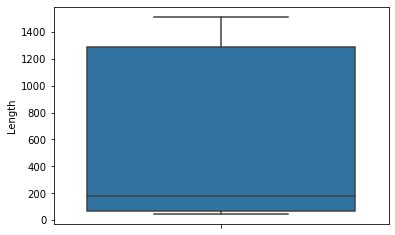

In [11]:
CN.reset_index() 
sns.boxplot(y='Length',data=CN)

#ENCODING SOURCE IP ADDRESS

In [13]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder() 
CN['Source']= labelencoder.fit_transform(CN['Source'])

#ENCODING DESTINATION IP ADDRESS

In [15]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder() 
CN['Destination']= labelencoder.fit_transform(CN['Destination']) 
CN.head()

,No.,Time,Source,Destination,Protocol,Length
1,2,0.000000,176,55,TLSv1.2,564
2,3,0.008414,176,55,TCP,54
3,4,0.000000,176,55,TLSv1.2,169
4,5,0.000172,53,184,TCP,54
5,6,0.001203,53,184,TLSv1.2,85


#VARIABLE ASSIGNMENT 
#INDEPENDENT VARIABLES

In [17]:
cols=['Time','Source','Destination','Length'] 
X=CN[cols]

#DEPENDENT VARIABLE

In [19]:
y=CN.Protocol

#SPLITTING THE DATASET INTO TRAINING AND TEST SET.

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#FEATURE SCALING

In [23]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler() 
X_train= st_x.fit_transform(X_train) 
X_test= st_x.transform(X_test)

#IMPLEMENTING ML ALGORITHMS
#DecisionTree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='gini') 
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy of Cart DecisionTree:",metrics.accuracy_score(y_test, y_pred))
print("Precision of Cart DecisionTree:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall of Cart DecisionTree:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy of Cart DecisionTree: 0.8733962720890825
Precision of Cart DecisionTree: 0.8623086773741939
Recall of Cart DecisionTree: 0.8733962720890825


In [25]:
from sklearn.svm import SVC #"Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print("Accuracy of SVM:",metrics.accuracy_score(y_test, y_pred))
print("Precision of SVM:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall of SVM:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy of SVM: 0.7367062051157912
Precision of SVM: 0.6209952554115622
Recall of SVM: 0.7367062051157912


In [26]:
from sklearn.naive_bayes import GaussianNB 
model=GaussianNB(priors=None, var_smoothing=1e-09) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))
print("Precision of Naive Bayes:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall of Naive Bayes:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy of Naive Bayes: 0.5833131606552086
Precision of Naive Bayes: 0.7034865873888703
Recall of Naive Bayes: 0.5833131606552086


In [27]:
CN['Protocol'].unique()

array(['TLSv1.2', 'TCP', 'TLSv1.3', 'ARP', 'ICMPv6', 'MDNS', 'SSDP',
       'ICMP', 'DNS', 'NTP', 'UDP', 'XMPP/XML', 'HTTP', 'OCSP', 'IGMPv3',
       'IPv4', 'TLSv1', 'QUIC', 'HTTP/JSON', 'LLMNR', 'DHCP', 'NAT-PMP',
       'TFTP', 'SSLv2', 'NBNS'], dtype=object)